In [1]:
from math import inf
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
xs = -1
xe = 1
ys = -1
ye = 1
xtics = 11
ytics = 11
num_p = 2001
x,y = np.meshgrid(np.linspace(xs, xe, num_p), np.linspace(ys, ye, num_p))

inf_comp = np.array(complex(inf, inf))
nanj = np.complex128(np.nan+(np.nan)*1j)

In [3]:
points = x + y*1j
z = np.zeros_like(points)
# z = points
iters = np.ones(points.shape)*np.inf

In [4]:
points = points[::-1]
print(points[0][0])

(-1+1j)


In [5]:
num_iter = 100
limit = 2
c = 1

for i in range(1, num_iter+2):
    z = np.square(z) + points
    np.nan_to_num(z, copy=False, posinf=True)
    # z = np.square(z) + c
    cond = i/(np.abs(z)>=limit)
    iters = np.minimum(cond, iters)

<ipython-input-5-a8956072d68a>:9: RuntimeWarning: divide by zero encountered in true_divide
  cond = i/(np.abs(z)>=limit)
<ipython-input-5-a8956072d68a>:6: RuntimeWarning: overflow encountered in square
  z = np.square(z) + points
<ipython-input-5-a8956072d68a>:6: RuntimeWarning: invalid value encountered in square
  z = np.square(z) + points
<ipython-input-5-a8956072d68a>:9: RuntimeWarning: overflow encountered in absolute
  cond = i/(np.abs(z)>=limit)


In [6]:
print(np.max(iters))
print(np.min(iters))
print(np.isnan(z[500][500]))

print(np.abs(z[0][0])>2)

inf
2.0
False
False


In [7]:
rangex = np.linspace(0, num_p, xtics).tolist()
rangex = [int(x) for x in rangex]
rangey = np.linspace(0, num_p, ytics).tolist()
rangey = [int(y) for y in rangey]
tics_x = np.linspace(xs, xe, xtics).tolist()
tics_x = [round(x, 2) for x in tics_x]
tics_y = np.linspace(ys, ye, ytics).tolist()
tics_y = [round(y, 2) for y in tics_y]

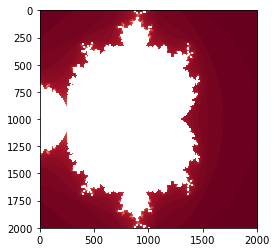

In [8]:
iters[iters == np.inf] = np.NINF
im = plt.imshow(iters,cmap=plt.cm.RdBu)

[]

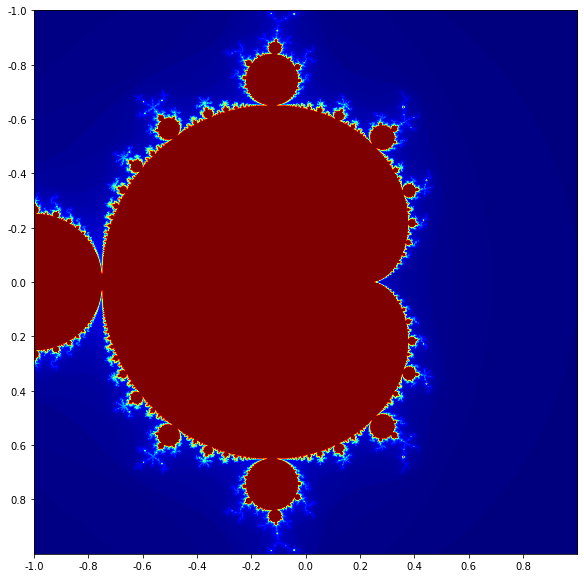

In [9]:
fig, ax = plt.subplots(figsize=(10, 10))
iters[iters == np.NINF] = np.max(iters)+100
ax.imshow(iters,cmap=plt.cm.jet)
plt.xticks(rangex, tics_x)
plt.yticks(rangey, tics_y)
plt.plot()